In [6]:
pip install scipy

     |████████████████████████████████| 38.1 MB 325 kB/s            4.7 MB/s eta 0:00:05
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=e1b6ae85d23ddc4ab79d3ac2277f64bd76d94de42467b85291c4955e790cfc0f
  Stored in directory: /home/jovyan/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

     |████████████████████████████████| 15.7 MB 4.7 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

     |████████████████████████████████| 11.2 MB 4.6 MB/s            
     |████████████████████████████████| 4.3 MB 37.8 MB/s            
     |████████████████████████████████| 1.1 MB 46.2 MB/s            
     |████████████████████████████████| 895 kB 30.0 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc 
import os.path as path
import wget

In [30]:
!rm Data/*
file = 'Data/ManchasSolares.dat'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionales/ManchasSolares.dat'
if not path.exists(file):
    Path_ = wget.download(url,file)
    print('Descargado')
else:
    Path_ = file
    

Descargado


In [68]:
data = np.loadtxt(Path_)
mask= data[:,0]>=1900
dat=data[mask]
año= dat[:,0]
mes= dat[:,1]
Nmanchas = dat[:,3]

In [82]:
Vmedio=Nmanchas-np.mean(Nmanchas)

X=np.fft.fft(Vmedio)
freq=np.fft.fftfreq(len(Vmedio),1)
mask1 = freq < 0
X[mask1] = 0

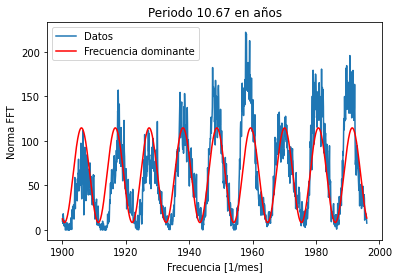

In [83]:
XMag_=np.abs(X)
XMag2_=np.argmax(XMag_)
freq_mes=freq[XMag2_]
freq_año=Ffreq_m*12
Periodo=1/freq_año

mask2=freq!=freq_mes
X[mask2]=0
Dominante=np.fft.ifft(2*X)
x=año+mes/12

plt.figure()
plt.plot(x,Nmanchas,label='Datos')
plt.plot(x,np.real(Dominante)+np.mean(Nmanchas),label='Frecuencia dominante',color='r')
plt.title(f'Periodo {round(Periodo,2)} en años')
plt.xlabel('Frecuencia [1/mes]')
plt.ylabel('Norma FFT')
plt.legend()
plt.show()